In [2]:
cd ~/DATA/Sentinel/ 

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [3]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from smoothn import *
import pylab as plt
%matplotlib inline
import mgrs
import pandas as pd
from scipy import interpolate
from nicer_plot import *

In [18]:
data = parallel_rw_pkl(None, 'Zinder0423_atm', 'r')

In [20]:
lat, lon = 13.77694,8.99
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
imgx,imgy

(7693, 9892)

In [21]:
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-7001).astype(int), (aerosols[1]-9001).astype(int)] = aerosols[2]

In [22]:
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, verbose=True, isrobust=True)

tol 1.0 nit 0
tol 2.34136271196 nit 1
tol 2.09181701645 nit 2
tol 1.98203040144 nit 3
tol 1.43470179792 nit 4
tol 1.13150157937 nit 5
tol 0.757390859452 nit 6
tol 0.541991449113 nit 7
tol 0.37627994282 nit 8
tol 0.264565404741 nit 9
tol 0.194496722773 nit 10
tol 0.139263384603 nit 11
tol 0.109735102171 nit 12
tol 0.0826806741603 nit 13
tol 0.0704720613264 nit 14
tol 0.0572805022377 nit 15
tol 0.052050986822 nit 16
tol 0.0453628595776 nit 17
tol 0.0426717377584 nit 18
tol 0.0389119882133 nit 19
tol 0.0371299971471 nit 20
tol 0.034731196428 nit 21
tol 0.0333391019197 nit 22
tol 0.0316381105476 nit 23
tol 0.0304741724199 nit 24
tol 0.0291762498233 nit 25
tol 0.0281805012059 nit 26
tol 0.0271410256251 nit 27
tol 0.0262813511705 nit 28
tol 0.0254210519196 nit 29
tol 0.0246740457924 nit 30
tol 0.0239449955032 nit 31
tol 0.0232914932352 nit 32
tol 0.0226624063555 nit 33
tol 0.0220864575448 nit 34
tol 0.0215357210626 nit 35
tol 0.021024178703 nit 36
tol 0.0205362284754 nit 37
tol 0.02007837566

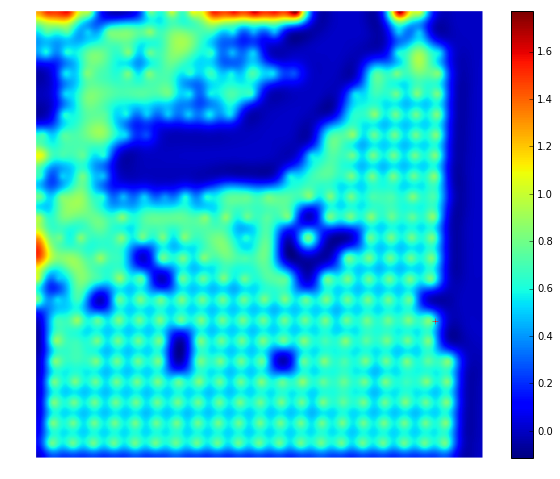

In [25]:
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(892,693 ,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()

In [26]:
(sm_aaro[0]*10)[693, 892]

0.57727513800684127

In [28]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160423_160423_Zinder_Airport.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
0,23:04:2016,06:12:39,114.258785,NaN,0.515337,0.552299,0.598942,NaN,NaN,NaN,NaN,NaN,0.640120,NaN,NaN,0.651157,NaN,0.659919,0.661022,0.291120
1,23:04:2016,06:33:33,114.273299,NaN,0.517925,0.553983,0.599378,NaN,NaN,NaN,NaN,NaN,0.640364,NaN,NaN,0.650962,NaN,0.659875,0.662269,0.298850
2,23:04:2016,07:16:52,114.303380,NaN,0.498715,0.534939,0.581257,NaN,NaN,NaN,NaN,NaN,0.624089,NaN,NaN,0.633349,NaN,0.641747,0.647715,0.297436
3,23:04:2016,13:24:30,114.558681,NaN,0.651127,0.700313,0.774763,NaN,NaN,NaN,NaN,NaN,0.839545,NaN,NaN,0.843063,NaN,0.853981,0.856111,0.295214
4,23:04:2016,15:06:14,114.629329,NaN,0.640796,0.688059,0.753882,NaN,NaN,NaN,NaN,NaN,0.811091,NaN,NaN,0.813049,NaN,0.824343,0.820641,0.284216
5,23:04:2016,15:31:14,114.646690,NaN,0.631717,0.676974,0.738769,NaN,NaN,NaN,NaN,NaN,0.791228,NaN,NaN,0.794840,NaN,0.804792,0.801332,0.299254
6,23:04:2016,16:14:58,114.677060,NaN,0.554353,0.592634,0.642917,NaN,NaN,NaN,NaN,NaN,0.686461,NaN,NaN,0.691255,NaN,0.701599,0.699347,0.309744
7,23:04:2016,16:35:48,114.691528,NaN,0.538208,0.575044,0.622602,NaN,NaN,NaN,NaN,NaN,0.664231,NaN,NaN,0.669701,NaN,0.680581,0.679325,0.313753


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


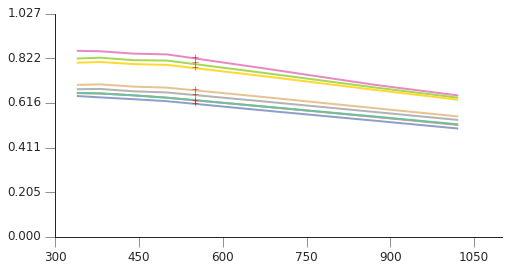

In [29]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [31]:
(aot550[2]+aot550[3])/2

0.72125416630261308

In [36]:
0.62# from the mean of that day

0.62

7693 9892


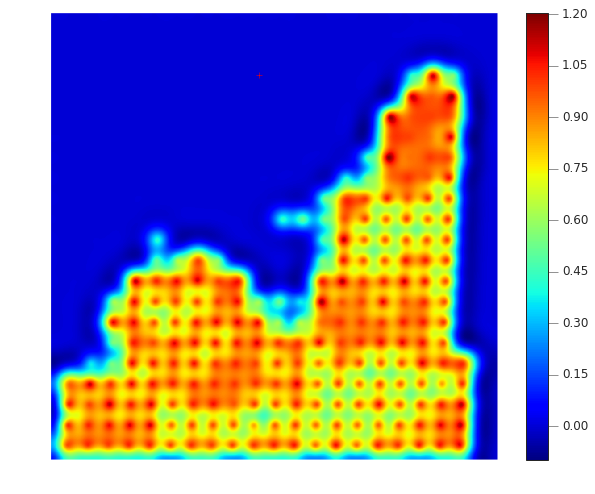

In [47]:
data = parallel_rw_pkl(None, 'Zinder0403_atm', 'r')
lat, lon = 13.77694,8.99
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-7001).astype(int), (aerosols[1]-9001).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(9465-9000, 8138-8000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()


In [48]:
print (sm_aaro[0]*10)[693, 892]

0.659254445424


In [8]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160401_160410_Zinder_Airport.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][11:15]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
11,03:04:2016,09:29:23,94.395405,NaN,0.783637,0.832386,0.899881,NaN,NaN,NaN,NaN,NaN,0.957391,NaN,NaN,0.956656,NaN,0.966592,0.965526,1.215703
12,03:04:2016,10:29:32,94.437176,NaN,0.746437,0.789435,0.855322,NaN,NaN,NaN,NaN,NaN,0.911944,NaN,NaN,0.908292,NaN,0.916752,0.917677,1.256507
13,03:04:2016,12:29:29,94.520475,NaN,0.678286,0.717421,0.779008,NaN,NaN,NaN,NaN,NaN,0.834362,NaN,NaN,0.828848,NaN,0.838770,0.842449,1.182560
14,03:04:2016,15:30:42,94.646319,NaN,0.734959,0.780196,0.841155,NaN,NaN,NaN,NaN,NaN,0.891278,NaN,NaN,0.893011,NaN,0.900353,0.896218,1.221532


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


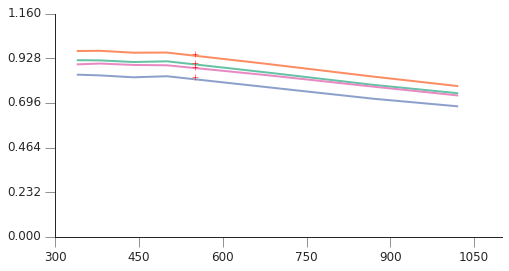

In [9]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [10]:
aot550

[array(0.9498181399300303),
 array(0.9056218900882314),
 array(0.8291056276154736),
 array(0.8835890691791332)]

In [11]:
(0.9056218900882314+0.8291056276154736)/2

0.8673637588518525

In [ ]:
0.659254445424; 0.8673637588518525

7693 9892
0.577275138007


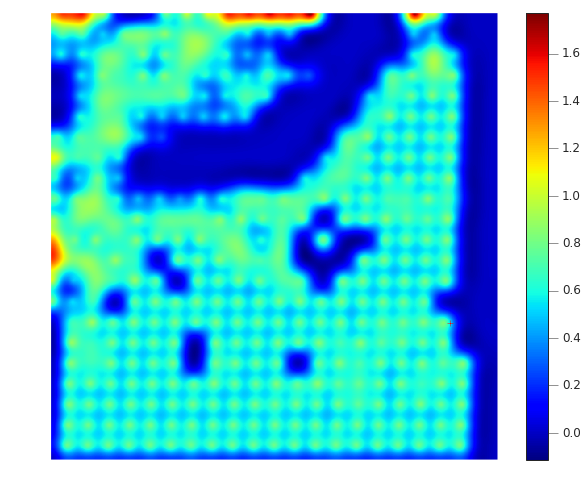

In [45]:
data = parallel_rw_pkl(None, 'Zinder0423_atm', 'r')
lat, lon = 13.77694,8.99
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-7001).astype(int), (aerosols[1]-9001).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [16]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160423_160423_Zinder_Airport.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
0,23:04:2016,06:12:39,114.258785,NaN,0.515337,0.552299,0.598942,NaN,NaN,NaN,NaN,NaN,0.640120,NaN,NaN,0.651157,NaN,0.659919,0.661022,0.291120
1,23:04:2016,06:33:33,114.273299,NaN,0.517925,0.553983,0.599378,NaN,NaN,NaN,NaN,NaN,0.640364,NaN,NaN,0.650962,NaN,0.659875,0.662269,0.298850
2,23:04:2016,07:16:52,114.303380,NaN,0.498715,0.534939,0.581257,NaN,NaN,NaN,NaN,NaN,0.624089,NaN,NaN,0.633349,NaN,0.641747,0.647715,0.297436
3,23:04:2016,13:24:30,114.558681,NaN,0.651127,0.700313,0.774763,NaN,NaN,NaN,NaN,NaN,0.839545,NaN,NaN,0.843063,NaN,0.853981,0.856111,0.295214
4,23:04:2016,15:06:14,114.629329,NaN,0.640796,0.688059,0.753882,NaN,NaN,NaN,NaN,NaN,0.811091,NaN,NaN,0.813049,NaN,0.824343,0.820641,0.284216
5,23:04:2016,15:31:14,114.646690,NaN,0.631717,0.676974,0.738769,NaN,NaN,NaN,NaN,NaN,0.791228,NaN,NaN,0.794840,NaN,0.804792,0.801332,0.299254
6,23:04:2016,16:14:58,114.677060,NaN,0.554353,0.592634,0.642917,NaN,NaN,NaN,NaN,NaN,0.686461,NaN,NaN,0.691255,NaN,0.701599,0.699347,0.309744
7,23:04:2016,16:35:48,114.691528,NaN,0.538208,0.575044,0.622602,NaN,NaN,NaN,NaN,NaN,0.664231,NaN,NaN,0.669701,NaN,0.680581,0.679325,0.313753


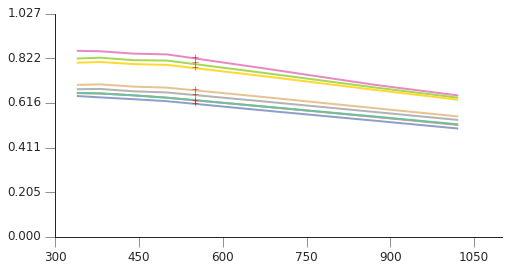

In [17]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [18]:
aot550

[array(0.6294247457840128),
 array(0.6298436713596556),
 array(0.6136651505376178),
 array(0.8288431820676084),
 array(0.8025500704972232),
 array(0.7825464391873651),
 array(0.6786214238542246),
 array(0.6563977848877679)]

In [14]:
imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000

(693, 892)

In [ ]:
0.577275138007, 0.8288431820676084 

7693 9892
-0.00444863769509


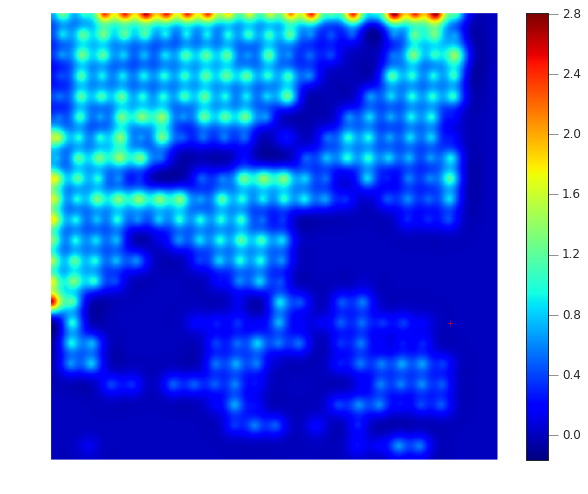

In [40]:
data = parallel_rw_pkl(None, 'Zinder0503_atm', 'r')
lat, lon = 13.77694,8.99
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [41]:
mean(aerosols[2])

0.30467261777350285

In [25]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160201_160531_Birdsville.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][223:226]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
223,03:05:2016,04:41:25,124.195428,NaN,0.020211,0.023625,0.029574,NaN,NaN,NaN,NaN,NaN,0.039914,NaN,NaN,0.044413,NaN,0.055033,0.059108,1.679000
224,03:05:2016,22:22:31,124.932303,NaN,0.020463,0.020319,0.020641,NaN,NaN,NaN,NaN,NaN,0.024995,NaN,NaN,0.027245,NaN,0.032401,0.031762,1.291010
225,03:05:2016,22:47:40,124.949769,NaN,0.019557,0.019627,0.020012,NaN,NaN,NaN,NaN,NaN,0.024504,NaN,NaN,0.027121,NaN,0.032003,0.032248,1.288474


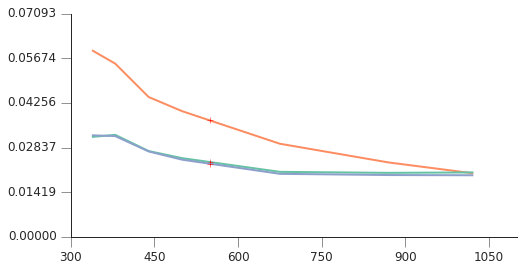

In [26]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [29]:
np.mean(aot550)

0.027999372824952809

In [ ]:
0.30467261777350285, 0.027999372824952809#mean

7693 9892
-3.36468149929e-06


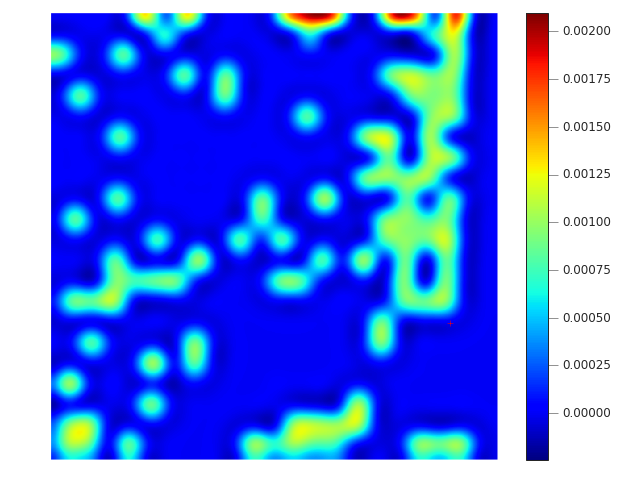

In [42]:
data = parallel_rw_pkl(None, 'Zinder0513_atm', 'r')
lat, lon = 13.77694,8.99
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-7001).astype(int), (aerosols[1]-9001).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [33]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160201_160531_Birdsville.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][265:275]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
265,13:05:2016,00:40:59,134.028461,NaN,0.016064,0.017237,0.017657,NaN,NaN,NaN,NaN,NaN,0.021859,NaN,NaN,0.025086,NaN,0.031116,0.035386,1.030906
266,13:05:2016,01:41:03,134.070174,NaN,0.015006,0.017075,0.018335,NaN,NaN,NaN,NaN,NaN,0.022300,NaN,NaN,0.025254,NaN,0.031352,0.036238,1.084531
267,13:05:2016,02:41:02,134.111829,NaN,0.014673,0.017049,0.018589,NaN,NaN,NaN,NaN,NaN,0.022612,NaN,NaN,0.025182,NaN,0.032117,0.036263,1.117491
268,13:05:2016,03:41:02,134.153495,NaN,0.014261,0.016445,0.018510,NaN,NaN,NaN,NaN,NaN,0.022412,NaN,NaN,0.024687,NaN,0.032102,0.034648,1.106932
269,13:05:2016,04:41:02,134.195162,NaN,0.012235,0.014956,0.016765,NaN,NaN,NaN,NaN,NaN,0.021435,NaN,NaN,0.023638,NaN,0.030584,0.033360,1.114094
270,13:05:2016,05:40:59,134.236794,NaN,0.013265,0.015574,0.017110,NaN,NaN,NaN,NaN,NaN,0.022536,NaN,NaN,0.024397,NaN,0.031809,0.033524,1.148549
271,13:05:2016,06:26:43,134.268553,NaN,0.013142,0.014971,0.016165,NaN,NaN,NaN,NaN,NaN,0.022034,NaN,NaN,0.024242,NaN,0.030956,0.032281,1.168490
272,13:05:2016,06:52:39,134.286563,NaN,0.013967,0.015381,0.016420,NaN,NaN,NaN,NaN,NaN,0.022434,NaN,NaN,0.024829,NaN,0.031201,0.032415,1.178851
273,13:05:2016,22:29:38,134.937245,NaN,0.013180,0.012979,0.012333,NaN,NaN,NaN,NaN,NaN,0.015945,NaN,NaN,0.018295,NaN,0.023771,0.023884,1.001229
274,13:05:2016,22:55:37,134.955289,NaN,0.012961,0.012563,0.012096,NaN,NaN,NaN,NaN,NaN,0.016269,NaN,NaN,0.019355,NaN,0.023788,0.024637,0.995282


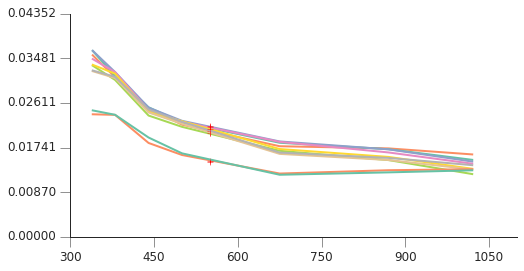

In [34]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [43]:
np.mean(aot550)

0.01966066287158879

In [44]:
np.mean(aerosols[2])

0.00037710187972874815

In [ ]:
0.00037710187972874815, 0.01966066287158879

In [ ]:
0.659254445424; 0.8673637588518525
0.577275138007, 0.8288431820676084 
0.30467261777350285, 0.027999372824952809#mean
0.00037710187972874815, 0.01966066287158879